<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [16]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install matplotlib-venn
import numpy as np


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [7]:
## Write your code 
pd.set_option('display.max_rows', None)
print(df.info())
print(df.dtypes.reset_index())
print(df.describe(include='all'))
pd.reset_option('display.max_rows')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
                              index        0
0                        ResponseId    int64
1                        MainBranch   object
2                               Age   object
3                        Employment   object
4                        RemoteWork   object
5                             Check   object
6                  CodingActivities   object
7                           EdLevel   object
8                         LearnCode   object
9                   LearnCodeOnline   object
10                          TechDoc   object
11                        YearsCode   object
12                     YearsCodePro   object
13                          DevType   object
14                          OrgSize   object
15                PurchaseInfluence   object
16                       BuyNewTool   object


### 
Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [8]:
## Write your code here
##pd.reset_option('display.max_rows')
subset_cols = ["MainBranch", "Employment", "RemoteWork", "Country"]
df_clean = df.copy()
df_clean = df_clean.drop_duplicates(subset=subset_cols)
df_no_duplicates = df_clean.drop_duplicates(
    subset=subset_cols,
    keep="first"
)

print("Original rows:", len(df))
print("After removing subset-based duplicates:", len(df_no_duplicates))
df.isna().sum()
df_clean.isna().sum()
df_clean[df_clean.isna().any(axis=1)]
missing_summary = pd.DataFrame({
    "Missing_Count": df_clean.isna().sum(),
    "Missing_Percent": (df_clean.isna().mean() * 100).round(2)
})
missing_summary_sorted = missing_summary.sort_values(
    by="Missing_Count",
    ascending=False
)
columns_with_missing = missing_summary_sorted[
    missing_summary_sorted["Missing_Count"] > 0
]
##with pd.option_context("display.max_rows", None):
    ## print(columns_with_missing)
##Impute RemoteWork column
print("Number of rows having no value in RemoteWork:",df_clean["RemoteWork"].isna().sum())
df_clean["RemoteWork"].value_counts()
valuecount = df_clean["RemoteWork"].value_counts()
majority_value = valuecount.idxmax()
majority_count = valuecount.max()


print("Majority value:", majority_value)
print("Count:", majority_count)
valuecount = df_clean["RemoteWork"].value_counts(dropna=False)
df_clean["RemoteWork_Imputed"] = df_clean["RemoteWork"].fillna(majority_value)
print(df_clean["RemoteWork_Imputed"].value_counts())

##Impute Employment column

most_frequent_emp = df["Employment"].mode()[0]
print("Most frequent value:", most_frequent_emp)
df["Employment_Imputed"] = df["Employment"].fillna(most_frequent_emp)
print(df["Employment"].head())
print(df["Employment_Imputed"].head())

##Impute codingactivities column
df["CodingActivities"].isna().sum()
df[df["CodingActivities"].isna()]
df["CodingActivities"].dropna().unique()

df["CodingActivities_Imputed"] = df["CodingActivities"].ffill()
print(df[["CodingActivities", "CodingActivities"]].head(10))
print(df[["CodingActivities_Imputed", "CodingActivities_Imputed"]].head(10))
print(df["CodingActivities_Imputed"].isna().sum())

##Impute numerical columns with median value
num_cols = df.select_dtypes(include="number").columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
##Impute categorical columns with mode value
cat_cols = df.select_dtypes(include=["object", "string"]).columns
for col in cat_cols:
    if df[col].isna().any():
        df[col].fillna(df[col].mode()[0])

Original rows: 65437
After removing subset-based duplicates: 6941
Number of rows having no value in RemoteWork: 2002
Majority value: Hybrid (some remote, some in-person)
Count: 1850
RemoteWork_Imputed
Hybrid (some remote, some in-person)    3852
Remote                                  1769
In-person                               1320
Name: count, dtype: int64
Most frequent value: Employed, full-time
0    Employed, full-time
1    Employed, full-time
2    Employed, full-time
3     Student, full-time
4     Student, full-time
Name: Employment, dtype: object
0    Employed, full-time
1    Employed, full-time
2    Employed, full-time
3     Student, full-time
4     Student, full-time
Name: Employment_Imputed, dtype: object
                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                Na

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [9]:
## Write your code here
##Calculate value count:
##print(df['Employment'].value_counts(dropna=False))
##print(df['JobSat'].value_counts(dropna=False))
##print(df['YearsCodePro'].value_counts(dropna=False))

##Display as percentage:
##print(df['Employment'].value_counts(normalize=True, dropna=False).round(2) * 100)
##print(df['JobSat'].value_counts(normalize=True, dropna=False).round(2) * 100)
##print(df['YearsCodePro'].value_counts(normalize=True, dropna=False).round(2) * 100)
cols = ['Employment', 'JobSat', 'YearsCodePro']
for col in cols:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts(normalize=True, dropna=False).round(2) * 100)


Value counts for Employment:

Employment
Employed, full-time                                                                                                                                   60.0
Independent contractor, freelancer, or self-employed                                                                                                   7.0
Student, full-time                                                                                                                                     7.0
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               5.0
Not employed, but looking for work                                                                                                                     4.0
                                                                                                                                                      ... 
Not employed, but looking fo

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


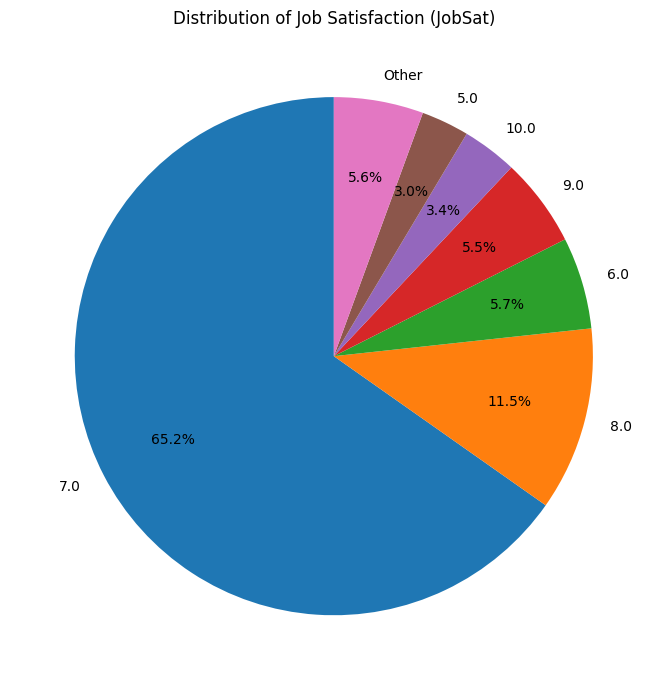

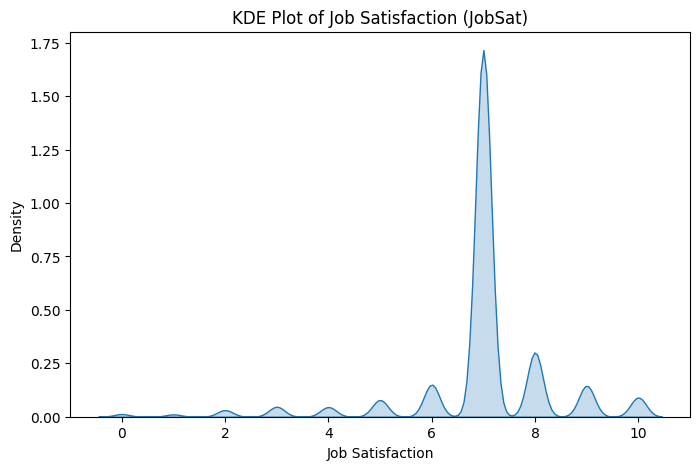

In [10]:
## Write your code here
##Pie chart
##Grouped small slices into “Other” for clearer pie chart display

job_sat_counts = df['JobSat'].value_counts(dropna=False)

threshold = 2  # percent cutoff
pct = job_sat_counts / job_sat_counts.sum() * 100

small = job_sat_counts[pct < threshold]
big = job_sat_counts[pct >= threshold]

job_sat_grouped = big.copy()
if len(small) > 0:
    job_sat_grouped["Other"] = small.sum()

plt.figure(figsize=(7, 7))
job_sat_grouped.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.7
)
plt.title("Distribution of Job Satisfaction (JobSat)")
plt.ylabel("")
plt.tight_layout()
plt.show()
##KDE plot
plt.figure(figsize=(8,5))
sns.kdeplot(df['JobSat'].dropna(), fill=True)
plt.title('KDE Plot of Job Satisfaction (JobSat)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Density')
plt.show()

##Pie Chart Interpretation

##The pie chart shows that job satisfaction responses are concentrated around the mid-to-high satisfaction levels. 
##This suggests that a majority of respondents report being moderately to highly satisfied with their jobs, while a smaller proportion 
##indicates low satisfaction or dissatisfaction. The presence of missing values (if any) may indicate non-response or uncertainty among some participants.

##KDE Plot Interpretation

##The KDE plot indicates that job satisfaction scores cluster toward the higher end of the scale, with a clear peak around mid-to-high values.
##This suggests an overall positive sentiment toward job satisfaction among respondents. The gradual decline toward lower scores indicates 
##fewer respondents experiencing low satisfaction, while the spread of the curve reflects variability in individual experiences.


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


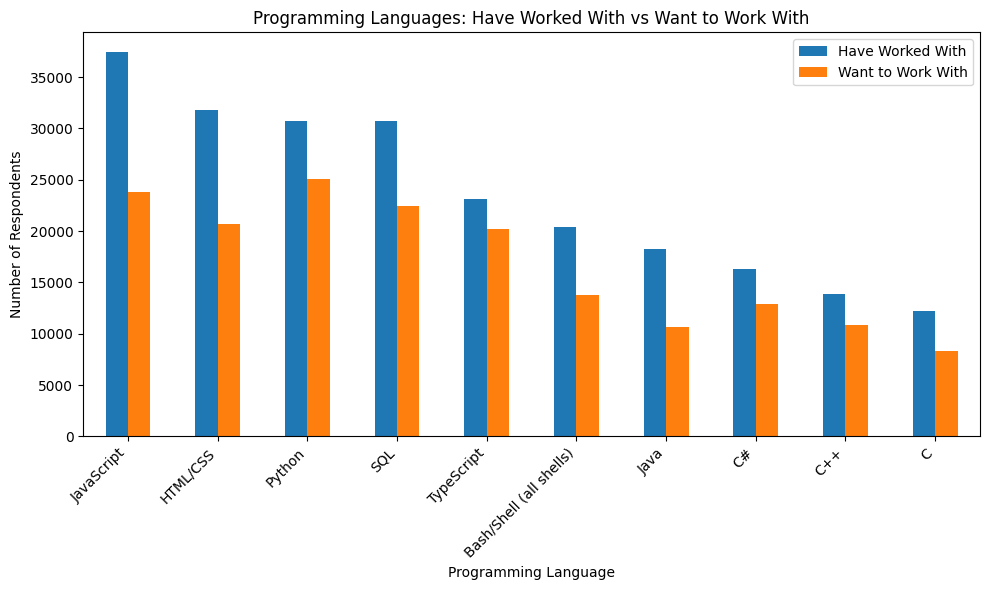

In [11]:
## Write your code here
##columns contains semicolon-separated values, so we must split them first

# Split and explode both columns
have = (
    df['LanguageHaveWorkedWith']
    .dropna()
    .str.split(';')
    .explode()
)

want = (
    df['LanguageWantToWorkWith']
    .dropna()
    .str.split(';')
    .explode()
)

# Value counts
have_counts = have.value_counts()
want_counts = want.value_counts()

##Grouped Bar Chart:
# Combine into one DataFrame
lang_df = pd.DataFrame({
    'Have Worked With': have_counts,
    'Want to Work With': want_counts
}).fillna(0)

# Select top N languages for readability
top_n = 10
lang_df = lang_df.sort_values(
    by=['Have Worked With', 'Want to Work With'],
    ascending=False
).head(top_n)

# Plot
lang_df.plot(kind='bar', figsize=(10,6))
plt.title('Programming Languages: Have Worked With vs Want to Work With')
plt.ylabel('Number of Respondents')
plt.xlabel('Programming Language')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


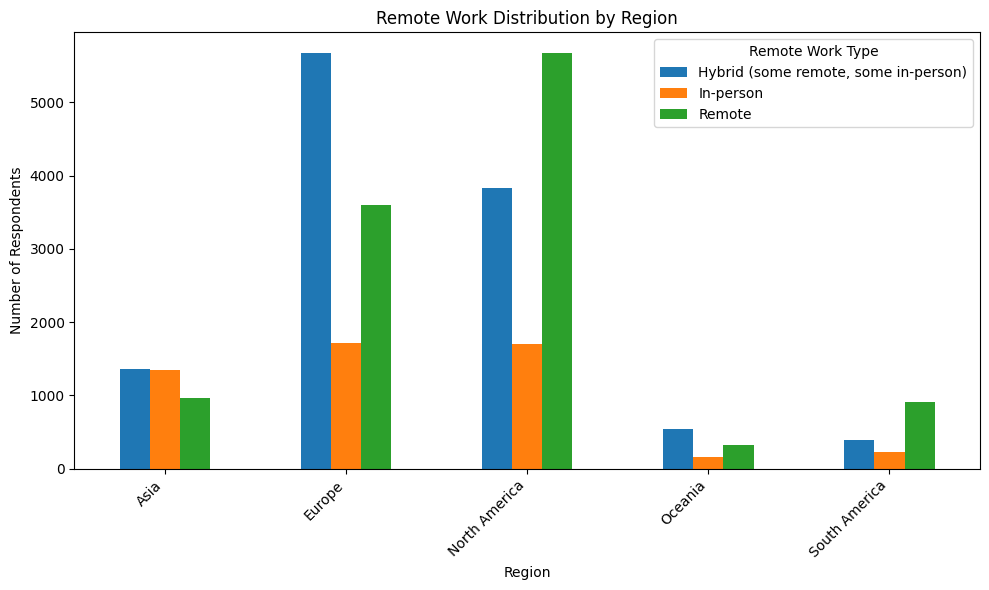

In [15]:
## Write your code here

df_country_clean = df[["Country"]].dropna()
##Define region
region_map = {
    "United States of America": "North America",
    "Canada": "North America",
    "United Kingdom of Great Britain and Northern Ireland": "Europe",
    "Germany": "Europe",
    "France": "Europe",
    "Spain": "Europe",
    "Italy": "Europe",
    "India": "Asia",
    "China": "Asia",
    "Japan": "Asia",
    "Brazil": "South America",
    "Argentina": "South America",
    "Australia": "Oceania"
}
df_country_clean["Region"] = df_country_clean["Country"].map(region_map)
df_lang = df_country_clean.dropna(subset=["Region"])

# Create a cross-tabulation - clear comparisons across regions
remote_region = pd.crosstab(df_lang["Region"] ,df['RemoteWork'])

remote_region.plot(
    kind='bar',
    figsize=(10,6)
)

plt.title('Remote Work Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work Type')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [17]:
## Write your code here
##Prepare the data
# Copy to avoid modifying original
df_corr = df[['JobSat', 'YearsCodePro']].copy()

# Convert YearsCodePro to numeric
df_corr['YearsCodePro'] = df_corr['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 50
})

df_corr['YearsCodePro'] = pd.to_numeric(df_corr['YearsCodePro'], errors='coerce')

# Drop rows with missing values
df_corr = df_corr.dropna()

##Pearson Correlation (Linear relationship)

pearson_corr = df_corr['JobSat'].corr(df_corr['YearsCodePro'], method='pearson')
print(f"Pearson correlation: {pearson_corr:.3f}")

##Spearman Correlation (Monotonic relationship)
spearman_corr = df_corr['JobSat'].corr(df_corr['YearsCodePro'], method='spearman')
print(f"Spearman correlation: {spearman_corr:.3f}")

##Pearson Interpretation 
##The Pearson correlation coefficient between job satisfaction and years of professional coding experience is weak and positive, indicating 
##that job satisfaction tends to increase slightly with experience, but the relationship is not strong.
 

Pearson correlation: 0.072
Spearman correlation: 0.090


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


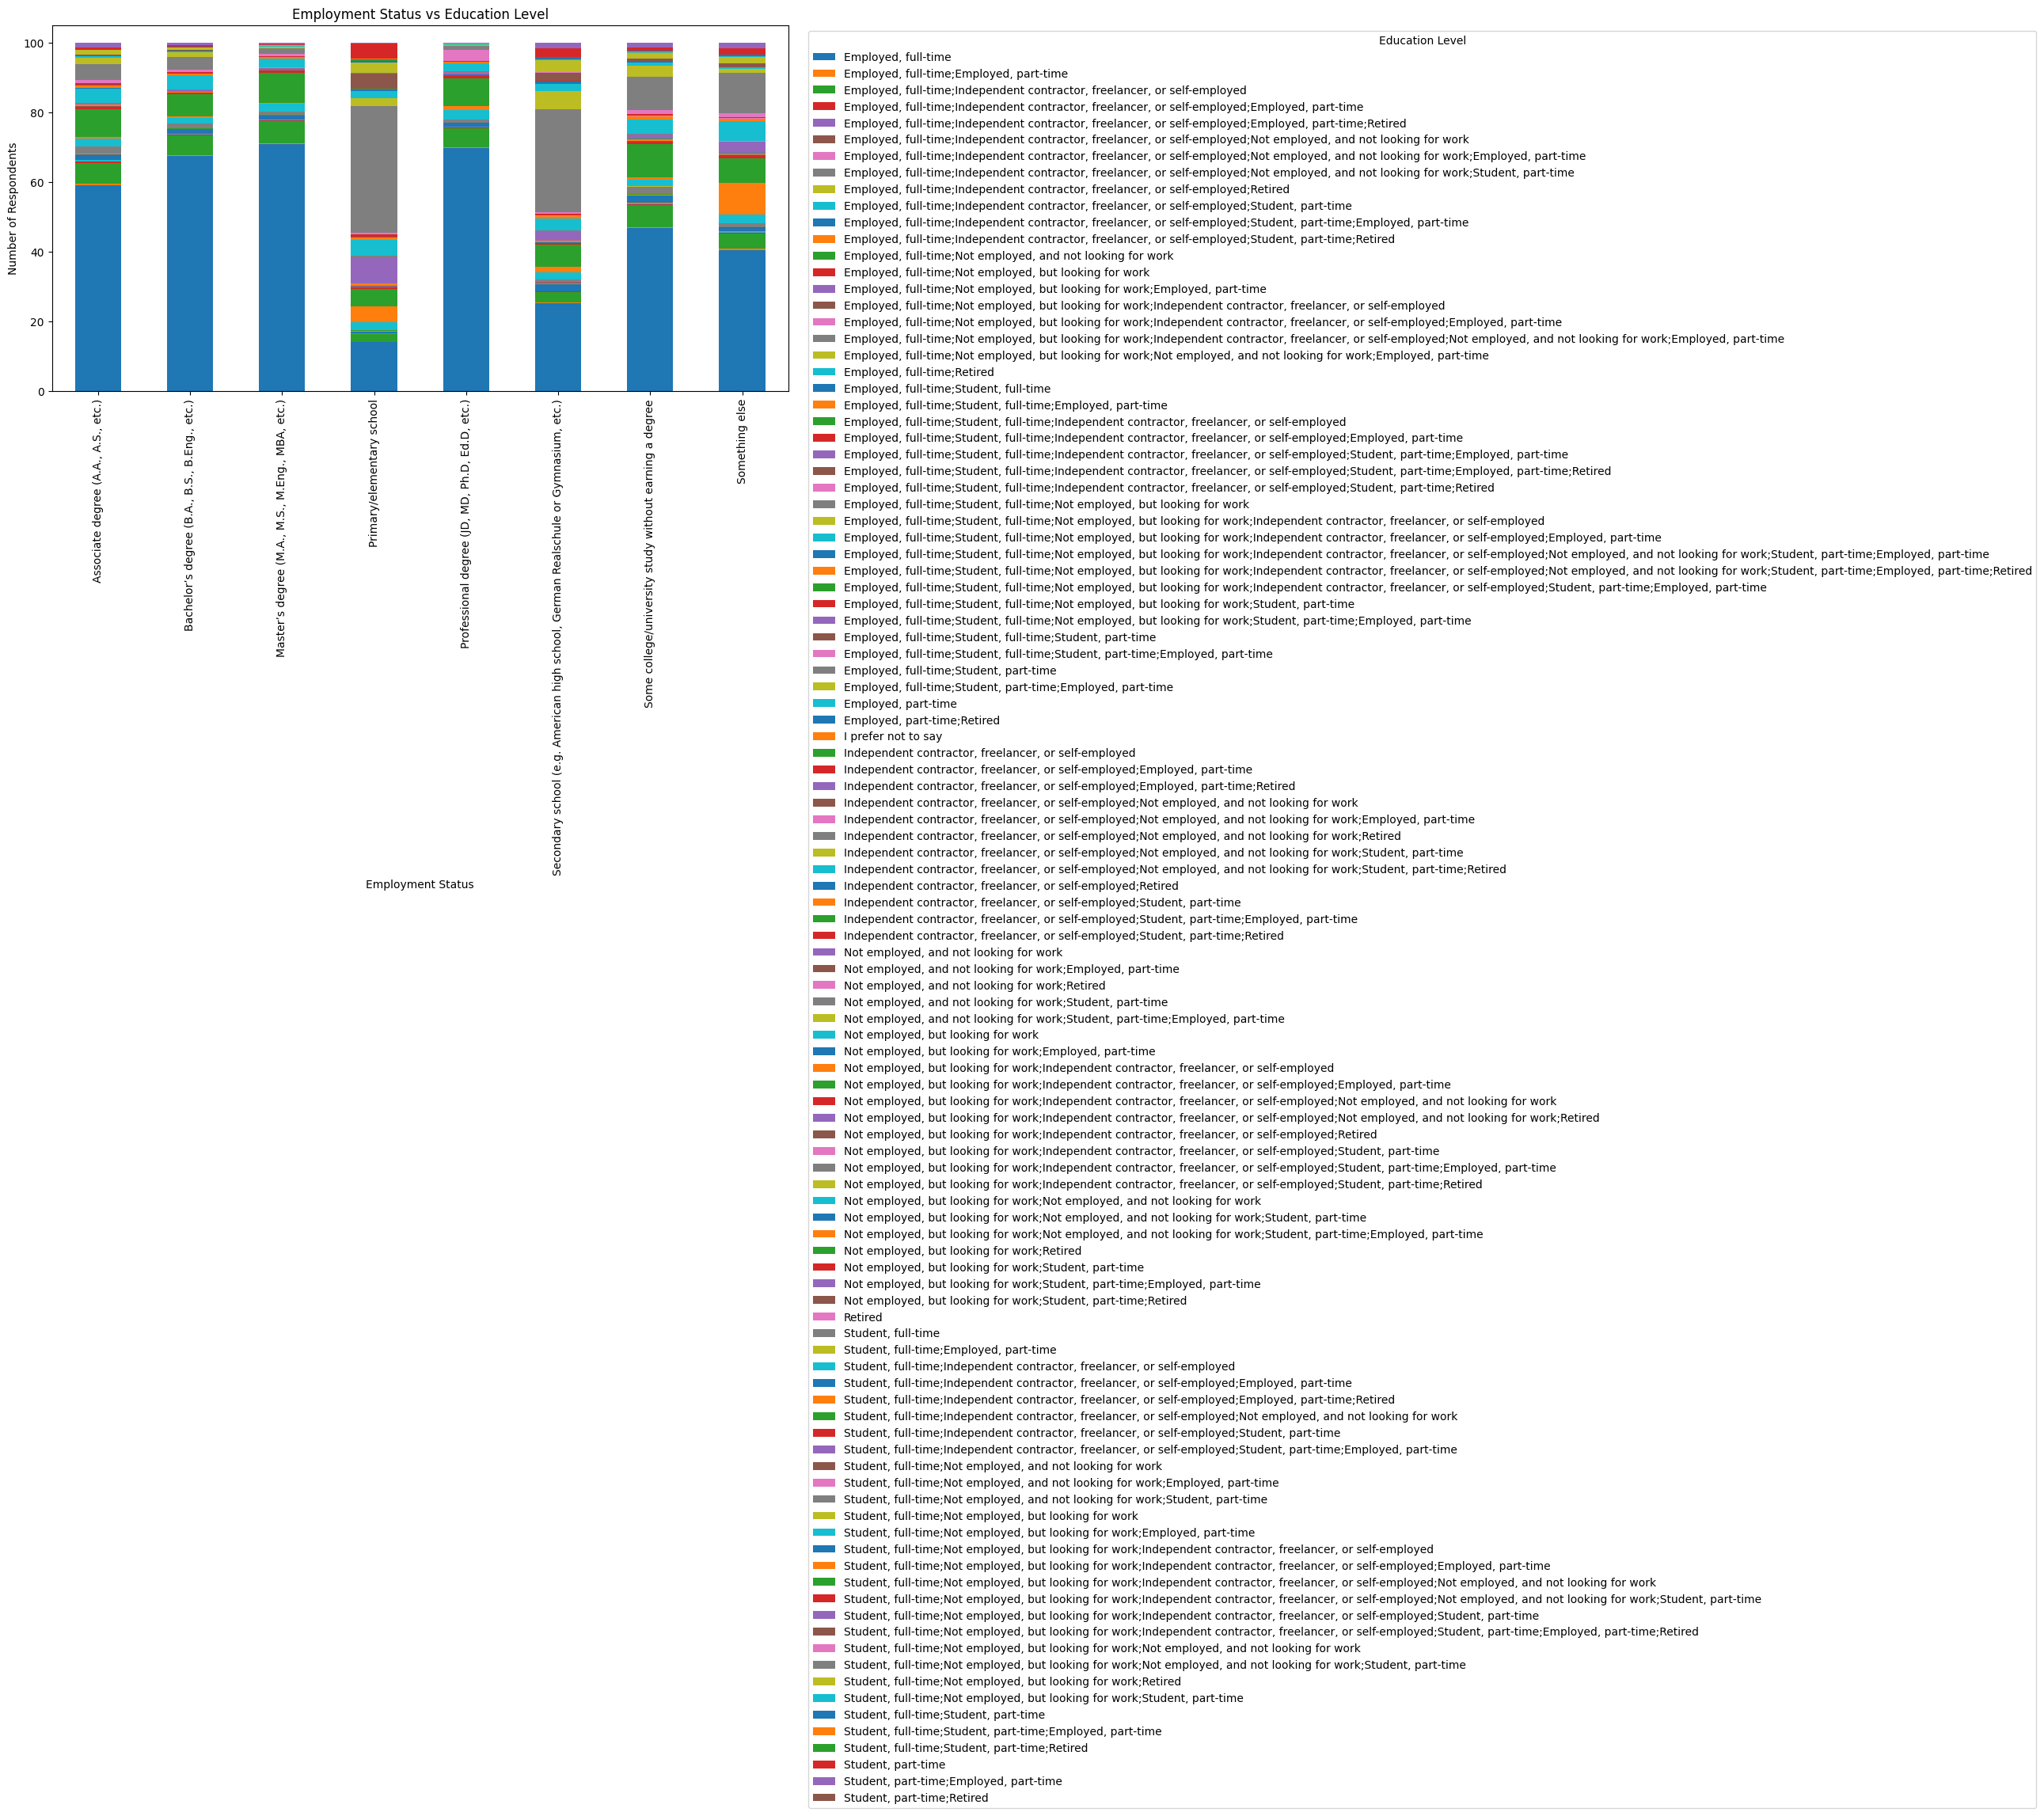

In [20]:
## Write your code here
df_edu_emp = df[["EdLevel", "Employment"]].dropna()
##raw counts of employment types for each education level.

df[["EdLevel", "Employment"]].isna().sum()
edu_emp_ct = pd.crosstab(df_edu_emp["EdLevel"], df_edu_emp["Employment"])
edu_emp_ct

##Normalize - Raw counts can be misleading because some education groups are larger. Percentages make comparisons fair
edu_emp_pct = pd.crosstab(
    df_edu_emp["EdLevel"],
    df_edu_emp["Employment"],
    normalize="index"
) * 100

edu_emp_pct.round(2)

top_emp = df_edu_emp["Employment"].value_counts().head(6).index
edu_emp_pct_top = edu_emp_pct[top_emp]
edu_emp_pct_top


edu_emp_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)

plt.title('Employment Status vs Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(
    title='Education Level',
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

df_master = df.copy()
##cleaned numeric columns
df_master["YearsCodePro_Num"] = (
    df_master["YearsCodePro"]
    .replace({
        "Less than 1 year": 0.5,
        "More than 50 years": 50
    })
)

df_master["YearsCodePro_Num"] = pd.to_numeric(
    df_master["YearsCodePro_Num"], errors="coerce"
)

df_master["JobSat_Num"] = pd.to_numeric(
    df_master["JobSat"], errors="coerce"
)
##experience ranges
df_master["ExperienceRange"] = pd.cut(
    df_master["YearsCodePro_Num"],
    bins=[0, 5, 10, 20, np.inf],
    labels=["0–5", "5–10", "10–20", "20+"],
    right=False
)
##imputed categorical columns
df_master["Employment_Imputed"] = df_master["Employment"].fillna(
    df_master["Employment"].mode()[0]
)

df_master["RemoteWork_Imputed"] = df_master["RemoteWork"].fillna(
    df_master["RemoteWork"].mode()[0]
)
##Create derived DataFrames ONLY for analysis - These are views for specific tasks, not permanent storage.
##Experience vs Satisfaction
df_exp_sat = df_master.dropna(
    subset=["YearsCodePro_Num", "JobSat_Num"]
).copy()

##Education vs Employment
df_edu_emp = df_master.dropna(
    subset=["EdLevel", "Employment_Imputed"]
).copy()

##Remote Work analysis
df_remote = df_master.dropna(
    subset=["RemoteWork_Imputed", "Employment_Imputed"]
).copy()

##Language / Region analysis
df_lang = df_master[["Country", "LanguageHaveWorkedWith"]].dropna().copy()

##Save to CSV
df_master.to_csv("survey_data_cleaned_final2.csv", index=False)


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
